Extracting data for question 1

In [60]:
import os
import pandas as pd

# Since the notebook is inside Project 2, we just go from current folder
folder = "computed data/pore analysis"

# List of target properties to extract
properties = [
    "Density",
    "ASA_m^2/g",
    "POAV_A^3",
    "POAV_Volume_fraction"
]

data = []

# Loop through all CSV files
for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        path = os.path.join(folder, filename)
        df = pd.read_csv(path)
        
        # Convert to dictionary for easy lookup
        kv = pd.Series(df.Value.values, index=df.Key).to_dict()
        
        # Extract desired properties
        entry = {"Material": filename.replace(".csv", "")}
        for prop in properties:
            entry[prop] = float(kv.get(prop, "nan"))
        
        data.append(entry)

# Create a summary dataframe
summary_df = pd.DataFrame(data)

# Display or save
print(summary_df)
summary_df.to_csv("pore_analysis_summary.csv", index=False)


  Material                Density                 ASA_m^2/g  \
0  MgMOF74 0.88627500000000003499 1842.96000000000003637979   
1  NOTT300 1.03926000000000007262 1648.23000000000001818989   
2   UTSA20 0.88239900000000004443 2607.09999999999990905053   
3   UTSA80 0.67821500000000001229 3188.86000000000012732926   
4     ZIF8 0.90956700000000001438 1736.32999999999992724042   

                   POAV_A^3   POAV_Volume_fraction  
0  837.19799999999997908162 0.61368000000000000327  
1 1297.10999999999989995558 0.48998999999999998112  
2 3575.36000000000012732926 0.62907000000000001805  
3 9619.78000000000065483619 0.66798000000000001819  
4 2488.25000000000000000000 0.49906000000000000361  


making a nice graph

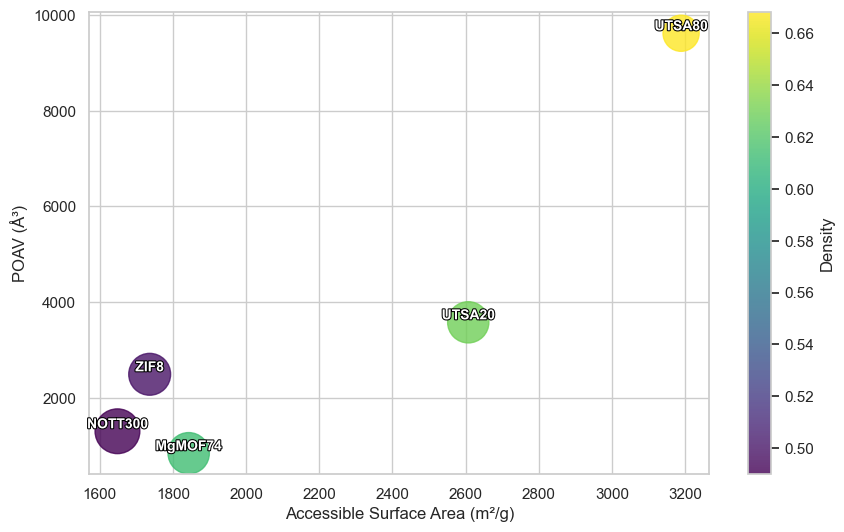

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patheffects as path_effects

# (same data)
data = {
    "Material": ["MgMOF74","NOTT300","UTSA20","UTSA80","ZIF8"],
    "Density": [0.88628, 1.03926, 0.88240, 0.67822, 0.90957],
    "ASA_m2/g": [1842.96, 1648.23, 2607.10, 3188.86, 1736.33],
    "POAV_A3": [837.20, 1297.11, 3575.36, 9619.78, 2488.25],
    "POAV_Volume_fraction": [0.61368, 0.48999, 0.62907, 0.66798, 0.49906]
}
df = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    df["ASA_m2/g"], df["POAV_A3"], 
    s=df["Density"]*1000,
    c=df["POAV_Volume_fraction"], cmap="viridis", alpha=0.8
)

for i, txt in enumerate(df["Material"]):
    text = plt.annotate(
        txt, 
        (df["ASA_m2/g"][i], df["POAV_A3"][i]), 
        fontsize=10, ha="center", va="bottom", color="white", weight="bold"
    )
    # Add black outline to make label readable on any color
    text.set_path_effects([
        path_effects.Stroke(linewidth=1.5, foreground='black'),
        path_effects.Normal()
    ])

plt.colorbar(scatter, label="Density")
plt.xlabel("Accessible Surface Area (m²/g)")
plt.ylabel("POAV (Å³)")
plt.show()


same for q2

In [62]:
import os
import pandas as pd
import numpy as np

folder = "computed data/HenryK_Isotherms"
mofs = ["MgMOF", "NOTT300", "UTSA20", "UTSA80", "ZIF8"]

henry_data = {"Material": [], "CO2": [], "N2": []}

for mof in mofs:
    henry_data["Material"].append(mof)
    
    for gas in ["CO2", "N2"]:
        file_path = os.path.join(folder, f"{mof}_{gas}.csv")
        df = pd.read_csv(file_path)
        
        row = df[df["Key"].str.strip() == "henry_coefficient_average"]
        if not row.empty:
            # Keep as string to preserve exact formatting
            kH = row["Value"].iloc[0]
        else:
            kH = np.nan
            
        henry_data[gas].append(kH)

# Create DataFrame
henry_df = pd.DataFrame(henry_data)

# Sort by CO2 descending
henry_df = henry_df.sort_values(by="CO2", ascending=False).reset_index(drop=True)

# Display exact values as strings (no rounding)
pd.set_option('display.float_format', lambda x: '%.20f' % x if pd.notnull(x) else 'NaN')
print(henry_df)


  Material          CO2           N2
0    MgMOF  8.89038e-05   3.3373e-06
1     ZIF8  8.80771e-06          NaN
2   UTSA20  4.10731e-05  4.38848e-06
3   UTSA80  1.69012e-05  3.33558e-06
4  NOTT300  0.000184318  1.05463e-05


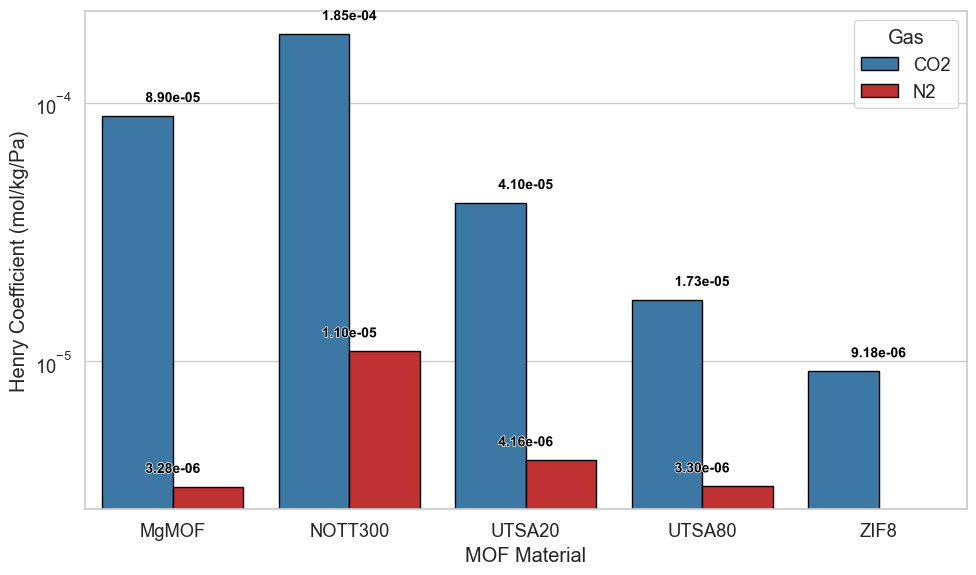

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as path_effects

# Data
data = {
    "Material": ["MgMOF","NOTT300","UTSA20","UTSA80","ZIF8"],
    "CO2": [0.0000890038, 0.0001845038, 0.0000410422, 0.0000173281, 0.0000091843],
    "N2": [0.0000032819, 0.0000109710, 0.0000041623, 0.0000032981, np.nan]
}
df = pd.DataFrame(data)

# Melt for Seaborn
df_melt = df.melt(id_vars="Material", value_vars=["CO2","N2"], var_name="Gas", value_name="Henry Coefficient")

# Plot settings
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10,6))
palette = {"CO2":"#2c7bb6", "N2":"#d7191c"}  # professional, contrasting colors
bar_plot = sns.barplot(
    x="Material", y="Henry Coefficient", hue="Gas",
    data=df_melt, palette=palette, edgecolor="black", dodge=True
)

# Add value labels inside bars (log scale aware)
for i, row in df_melt.iterrows():
    if not np.isnan(row["Henry Coefficient"]):
        bar_plot.text(
            x=i % 5,
            y=row["Henry Coefficient"]*1.1,  # slightly above for small bars
            s=f"{row['Henry Coefficient']:.2e}",  # scientific notation
            ha="center",
            va="bottom",
            fontsize=10,
            weight="bold",
            color="black",
            path_effects=[path_effects.Stroke(linewidth=1, foreground='white'), path_effects.Normal()]
        )

plt.yscale("log")
plt.ylabel("Henry Coefficient (mol/kg/Pa)")
plt.xlabel("MOF Material")
plt.legend(title="Gas", loc="upper right")
plt.tight_layout()
plt.show()


3. pure isotherms: 

⚠️ ZIF8_N2.csv ignoré (pas de clé 'isotherm').


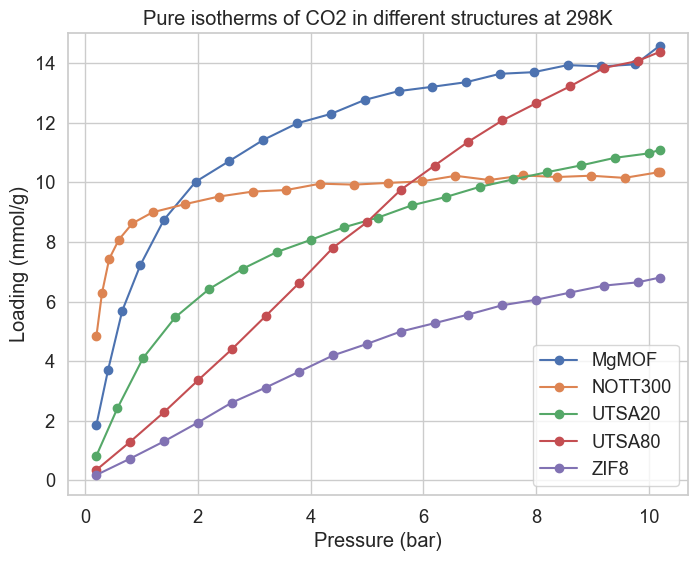

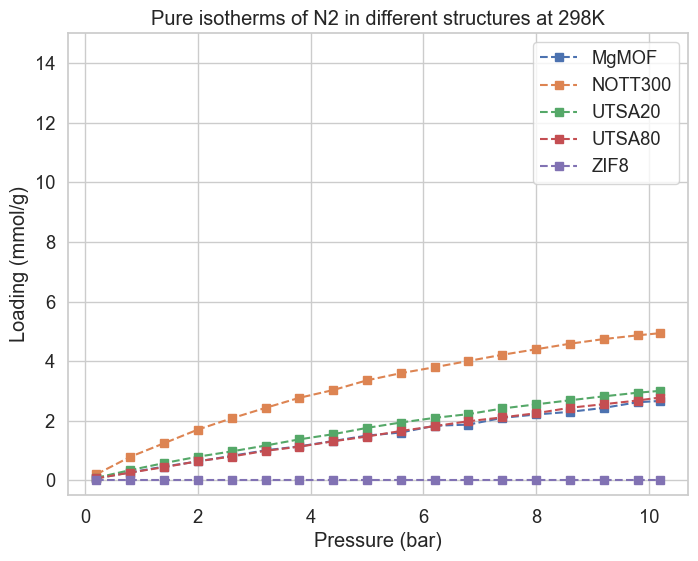

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# Folder containing the csv files
folder_path = "computed data/HenryK_Isotherms"

# Dictionnaire pour stocker les DataFrames d'isothermes
isotherms = {}

for filename in os.listdir(folder_path):
    if not filename.endswith(".csv"):
        continue

    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)

    # Vérifie que le fichier contient bien la clé "isotherm"
    if "Key" not in df.columns or "Value" not in df.columns:
        print(f"⚠️ {filename} ignoré (pas les colonnes attendues).")
        continue

    mask = df["Key"] == "isotherm"
    if not mask.any():
        print(f"⚠️ {filename} ignoré (pas de clé 'isotherm').")
        continue

    # Extraction de la chaîne
    isotherm_str = df.loc[mask, "Value"].values[0]

    try:
        # Conversion en dictionnaire Python
        isotherm_dict = ast.literal_eval(isotherm_str)

        # Création du DataFrame
        df_iso = pd.DataFrame({
            "pressure": isotherm_dict["pressure"],
            "loading_absolute_average": isotherm_dict["loading_absolute_average"]
        })

        # Enregistre le DataFrame sous le nom du fichier (sans extension)
        material_name = os.path.splitext(filename)[0]
        isotherms[material_name] = df_iso

    except Exception as e:
        print(f"❌ Erreur dans {filename}: {e}")

# Plotting the pure isotherms
plt.figure(figsize=(8,6))
plt.ylim(-0.5, 15)
for name, df_iso in isotherms.items():
    if "CO2" in name:
        plt.plot(df_iso["pressure"], df_iso["loading_absolute_average"], 'o-', label=os.path.splitext(name)[0].split("_")[0])
plt.xlabel("Pressure (bar)")
plt.ylabel("Loading (mmol/g)")
plt.title("Pure isotherms of CO2 in different structures at 298K")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.ylim(-0.5, 15)
for name, df_iso in isotherms.items():
    if "N2" in name:plt.plot(df_iso["pressure"], df_iso["loading_absolute_average"], 's--', label=os.path.splitext(name)[0].split("_")[0])
plt.plot(isotherms["ZIF8_CO2"]["pressure"], np.zeros_like(isotherms[key]["pressure"]), 's--', label="ZIF8")  
plt.xlabel("Pressure (bar)")
plt.ylabel("Loading (mmol/g)")
plt.title("Pure isotherms of N2 in different structures at 298K")
plt.legend()
plt.grid(True)
plt.show()

4. working capacity + 5. selectivity + 6. plot WC vs S

For MgMOF: Working capacity of CO₂ = 1.1008 mol/kg
📊 Sélectivités IAST CO₂/N₂ à 1 bar pour le MgMOF : S_CO₂/N₂ = 0.92

For NOTT300: Working capacity of CO₂ = 2.7748 mol/kg
📊 Sélectivités IAST CO₂/N₂ à 1 bar pour le NOTT300 : S_CO₂/N₂ = 0.93

For UTSA20: Working capacity of CO₂ = 0.4802 mol/kg
📊 Sélectivités IAST CO₂/N₂ à 1 bar pour le UTSA20 : S_CO₂/N₂ = 0.31

For UTSA80: Working capacity of CO₂ = 0.2032 mol/kg
📊 Sélectivités IAST CO₂/N₂ à 1 bar pour le UTSA80 : S_CO₂/N₂ = 0.17

⚠️ Missing data for ZIF8: 'ZIF8_N2'
  Material         Pressure (bar)         q_CO2 (mol/kg)  \
0    MgMOF 1.00000000000000000000 1.37966066765164185881   
1  NOTT300 1.00000000000000000000 3.49615087910859667630   
2   UTSA20 1.00000000000000000000 0.60436857290720003011   
3   UTSA80 1.00000000000000000000 0.25555384286728904941   

           q_N2 (mol/kg)     Selectivity CO2/N2  Working Capacity (mol/kg)  
0 0.26533866290074820116 0.91758029879217173352     1.10075269504354444905  
1 0.66634714496794800187 

C:\Users\eiche\AppData\Local\Temp\ipykernel_73424\2735184618.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\eiche\anaconda3\envs\modlab\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


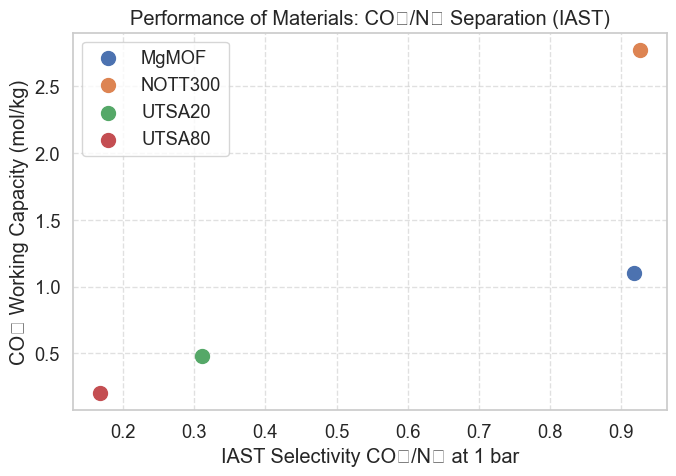

In [65]:
import pyiast
import numpy as np
import pandas as pd

isotherm_models = {}

for name, df_iso in isotherms.items():
    isotherm_models[name] = pyiast.InterpolatorIsotherm(
        df_iso,
        loading_key="loading_absolute_average",
        pressure_key="pressure",
        fill_value=df_iso["loading_absolute_average"].max()
    )

# Composition du mélange gazeux (CO₂/N₂ = 15/85)
mole_fraction = np.array([0.15, 0.85])  # [y_CO2, y_N2]
pressures = [0.2, 1.0]  # en bar

working_capacities = {}
selectivities = []

materials = ["MgMOF", "NOTT300", "UTSA20", "UTSA80", "ZIF8"]

for material in materials:
    try:
        iso_co2 = isotherm_models[f"{material}_CO2"]
        iso_n2  = isotherm_models[f"{material}_N2"]

        # --- IAST à 0.2 bar et 1 bar ---
        result_low  = pyiast.iast(partial_pressures=pressures[0] * mole_fraction,
                                  isotherms=[iso_co2, iso_n2],
                                  verboseflag=False)
        result_high = pyiast.iast(partial_pressures=pressures[1] * mole_fraction,
                                  isotherms=[iso_co2, iso_n2],
                                  verboseflag=False)

        # --- Capacité de travail ---
        q_working = result_high[0] - result_low[0]
        working_capacities[material] = q_working
        print(f"For {material}: Working capacity of CO₂ = {q_working:.4f} mol/kg")

        # --- Sélectivité (à 1 bar) ---
        q_CO2, q_N2 = result_high[0], result_high[1]
        selectivity = (q_CO2 / q_N2) / (mole_fraction[1] / mole_fraction[0])

        selectivities.append({
            "Material": material,
            "Pressure (bar)": pressures[1],
            "q_CO2 (mol/kg)": q_CO2,
            "q_N2 (mol/kg)": q_N2,
            "Selectivity CO2/N2": selectivity
        })
        print(f"📊 Sélectivités IAST CO₂/N₂ à 1 bar pour le {material} : S_CO₂/N₂ = {selectivity:.2f}\n")

    except KeyError as e:
        print(f"⚠️ Missing data for {material}: {e}")
    except Exception as e:
        print(f"❌ Error for {material}: {e}")


# Transformer les sélectivités en DataFrame
df_select = pd.DataFrame(selectivities)

# Ajouter la capacité de travail correspondante
df_select["Working Capacity (mol/kg)"] = df_select["Material"].map(working_capacities)

print(df_select)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Tracer chaque matériau avec un label
for _, row in df_select.iterrows():
    plt.scatter(row["Selectivity CO2/N2"], row["Working Capacity (mol/kg)"], s=100, label=row["Material"])

plt.xlabel("IAST Selectivity CO₂/N₂ at 1 bar")
plt.ylabel("CO₂ Working Capacity (mol/kg)")
plt.title("Performance of Materials: CO₂/N₂ Separation (IAST)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()    